# CS 584-A: Natural Language Processing

## Student information
- Full name: Thanapoom Phatthanaphan
- CWID: 20011296

## Homework 1
### Goals
The goal of HW1 is for you to get familiar with extracting features and standard machine learning workflows, including reading data, preprocessing data, training, testing, and evaluation. All those are open questions and there is no fixed solution. The difference in data processing, parameter initialization, data split, etc, will lead to the differences in final predications and evaluation results. Therefore, during the grading, the specific values in the results are not important. It is important that you focus on implementing the functions and setting up the pipelines.
### Dataset
The dataset is about the product review dataset from Amazon. Please download it from Canvas. The dataset provides product reviews and overall ratings for 4,195 products. We will consider the fine-grained overall ratings as labels, which are ranging from 1 to 5: highly negative, negative, neutral, positive, and highly positive.

## Task: Sentiment Abalysis with Text Classification
Based on the dataset, the task is to perform sentiment analysis, which predicts the sentiments based on the free-text reviews. You can solve the task as a multi-class classification problem (5 classes in total). You can also simplify the task as a binary classification problem. Specifically, we will consider the rating 4 and 5 as positive, and rating 1 and 2 as negative. For data samples with neutral rating 3, you can discard them or simply consider them as either positive or negative samples.

***In the submission, please make sure to clearly mention which task you are solving and how did you prepare the class labels.***

## Task 1: Extraction features

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1. Data preparation

In [2]:
# Import necessary libraries for data preparation
import numpy as np
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
import re

#### 1.1 Data preprocessing
Download and load the dataset. Please process the reviews by
<br>1) converting all text to lowercase to ensure uniformity.
<br>2) removing punctuations, numbers, and stopwords.
<br>3) tokenizing the reviews into tokens. If you plan to work on the binary classification problem, you will need to assign binary class labels based on the above-mentioned strategy.

In [3]:
# Import dataset
dataset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/amazon_reviews.csv")
dataset

,overall,reviewText
0,4,No issues.
1,5,"Purchased this for my device, it worked as adv..."
2,4,it works as expected. I should have sprung for...
3,5,This think has worked out great.Had a diff. br...
4,5,"Bought it with Retail Packaging, arrived legit..."
...,...,...
4910,1,I bought this Sandisk 16GB Class 10 to use wit...
4911,5,Used this for extending the capabilities of my...
4912,5,Great card that is very fast and reliable. It ...
4913,5,Good amount of space for the stuff I want to d...


In [4]:
def clean_text(text):

    """ A function to clean the text"""

    # Convert all text to lowercase to ensure uniformity
    text = str(text).lower()

    # Remove punctuations, and numbers
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\d', '', text)

    # Create a set of stopwords
    stop_words = set(stopwords.words('english'))

    # Tokenize the text into words
    words = tokenization(text)

    tokenized_text = []
    for token in words:

        # Get the token excludes those stopwords
        if token not in stop_words:
            tokenized_text.append(token)

    return tokenized_text

def tokenization(text):

    """ A function to tokenize the text """

    words = nltk.word_tokenize(text)

    return words

dataset["reviewText"] = dataset["reviewText"].apply(clean_text)
dataset

,overall,reviewText
0,4,[issues]
1,5,"[purchased, device, worked, advertised, never,..."
2,4,"[works, expected, sprung, higher, capacity, th..."
3,5,"[think, worked, greathad, diff, bran, gb, card..."
4,5,"[bought, retail, packaging, arrived, legit, or..."
...,...,...
4910,1,"[bought, sandisk, gb, class, use, htc, inspire..."
4911,5,"[used, extending, capabilities, samsung, galax..."
4912,5,"[great, card, fast, reliable, comes, optional,..."
4913,5,"[good, amount, space, stuff, want, fits, gopro..."


#### 1.2 Data split
Split the data with the ratio of 0.8, 0.1, and 0.1 into training, validation/development, and testing, respectively.

In [5]:
# Import necessary library for splitting data
from sklearn.model_selection import train_test_split

In [6]:
def split_data(dataset, train_data_ratio, validate_data_ratio, test_data_ratio):

    """A function to split the dataset into 3 parts including,
    train data, validation data, and test data"""

    train_data, remaining_data = train_test_split(dataset,
                                                  train_size=0.8,
                                                  random_state=100)
    validate_data, test_data = train_test_split(remaining_data,
                                                test_size=0.1,
                                                random_state=100)
    splitted_data = [train_data, validate_data, test_data]

    return splitted_data

# Define the ratio for train data, validation data, and test data
train_data_ratio, validate_data_ratio, test_data_ratio = 0.8, 0.1, 0.1

# Split the dataset into 3 parts including, train data, validation data, and test data
splitted_data = split_data(dataset, train_data_ratio, validate_data_ratio, test_data_ratio)
train_data, validate_data, test_data = splitted_data[0], splitted_data[1], splitted_data[2]

#### 1.3 Data statistics
Calculate the basic statistics of the splitted data (train data, validate data, test data) including, the number of samples, the minimum, maximum, and average number of tokens, the number of positive, and negative reviews.

In [7]:
# Get the number of tokens
def get_num_tokens(tokens_list):

    """A function to get the number of tokens"""

    return len(tokens_list)

# Calculate basic statistics of the data
dataset_info = {
    'Group of data': ['Train data',
                      'Validate data',
                      'Test data'],
    '#data samples': [len(train_data),
                      len(validate_data),
                      len(test_data)],
    'Min. #tokens': [min(train_data['reviewText'].apply(get_num_tokens)),
                     min(validate_data['reviewText'].apply(get_num_tokens)),
                     min(test_data['reviewText'].apply(get_num_tokens))],
    'Min. #tokens of positive reviews': [min(train_data['reviewText'][train_data['overall'] >= 4].apply(get_num_tokens)),
                                         min(validate_data['reviewText'][validate_data['overall'] >= 4].apply(get_num_tokens)),
                                         min(test_data['reviewText'][test_data['overall'] >= 4].apply(get_num_tokens))],
    'Min. #tokens of neutral reviews': [min(train_data['reviewText'][train_data['overall'] == 3].apply(get_num_tokens)),
                                        min(validate_data['reviewText'][validate_data['overall'] == 3].apply(get_num_tokens)),
                                        min(test_data['reviewText'][test_data['overall'] == 3].apply(get_num_tokens))],
    'Min. #tokens of negative reviews': [min(train_data['reviewText'][train_data['overall'] < 3].apply(get_num_tokens)),
                                         min(validate_data['reviewText'][validate_data['overall'] < 3].apply(get_num_tokens)),
                                         min(test_data['reviewText'][test_data['overall'] < 3].apply(get_num_tokens))],
    'Avg. #tokens': [train_data['reviewText'].apply(get_num_tokens).mean(),
                     validate_data['reviewText'].apply(get_num_tokens).mean(),
                     test_data['reviewText'].apply(get_num_tokens).mean()],
    'Avg. #tokens of positive reviews': [train_data['reviewText'][train_data['overall'] >= 4].apply(get_num_tokens).mean(),
                                         validate_data['reviewText'][validate_data['overall'] >= 4].apply(get_num_tokens).mean(),
                                         test_data['reviewText'][test_data['overall'] >= 4].apply(get_num_tokens).mean()],
    'Avg. #tokens of neutral reviews': [train_data['reviewText'][train_data['overall'] == 3].apply(get_num_tokens).mean(),
                                        validate_data['reviewText'][validate_data['overall'] == 3].apply(get_num_tokens).mean(),
                                        test_data['reviewText'][test_data['overall'] == 3].apply(get_num_tokens).mean()],
    'Avg. #tokens of negative reviews': [train_data['reviewText'][train_data['overall'] < 3].apply(get_num_tokens).mean(),
                                         validate_data['reviewText'][validate_data['overall'] < 3].apply(get_num_tokens).mean(),
                                         test_data['reviewText'][test_data['overall'] < 3].apply(get_num_tokens).mean()],
    'Max. #tokens': [max(train_data['reviewText'].apply(get_num_tokens)),
                     max(validate_data['reviewText'].apply(get_num_tokens)),
                     max(test_data['reviewText'].apply(get_num_tokens))],
    'Max. #tokens of positive reviews': [max(train_data['reviewText'][train_data['overall'] >= 4].apply(get_num_tokens)),
                                         max(validate_data['reviewText'][validate_data['overall'] >= 4].apply(get_num_tokens)),
                                         max(test_data['reviewText'][test_data['overall'] >= 4].apply(get_num_tokens))],
    'Max. #tokens of neutral reviews': [max(train_data['reviewText'][train_data['overall'] == 3].apply(get_num_tokens)),
                                        max(validate_data['reviewText'][validate_data['overall'] == 3].apply(get_num_tokens)),
                                        max(test_data['reviewText'][test_data['overall'] == 3].apply(get_num_tokens))],
    'Max. #tokens of negative reviews': [max(train_data['reviewText'][train_data['overall'] < 3].apply(get_num_tokens)),
                                         max(validate_data['reviewText'][validate_data['overall'] < 3].apply(get_num_tokens)),
                                         max(test_data['reviewText'][test_data['overall'] < 3].apply(get_num_tokens))],
    '#positive reviews': [len(train_data[train_data['overall'] >= 4]),
                           len(validate_data[validate_data['overall'] >= 4]),
                           len(test_data[test_data['overall'] >= 4])],
    '#neutral reviews': [len(train_data[train_data['overall'] == 3]),
                         len(validate_data[validate_data['overall'] == 3]),
                         len(test_data[test_data['overall'] == 3])],
    '#negative reviews': [len(train_data[train_data['overall'] < 3]),
                          len(validate_data[validate_data['overall'] < 3]),
                          len(test_data[test_data['overall'] < 3])]
}

# Create a DataFrame that contains the statistics of the data
dataset_info_table = pd.DataFrame(dataset_info)

# Print the statistics table
dataset_info_table

,Group of data,#data samples,Min. #tokens,Min. #tokens of positive reviews,Min. #tokens of neutral reviews,Min. #tokens of negative reviews,Avg. #tokens,Avg. #tokens of positive reviews,Avg. #tokens of neutral reviews,Avg. #tokens of negative reviews,Max. #tokens,Max. #tokens of positive reviews,Max. #tokens of neutral reviews,Max. #tokens of negative reviews,#positive reviews,#neutral reviews,#negative reviews
0,Train data,3932,1,1,4,2,25.332655,22.894722,34.254545,54.957692,781,544,210,781,3562,110,260
1,Validate data,884,1,1,9,8,25.682127,23.543179,43.620690,46.910714,364,364,261,147,799,29,56
2,Test data,99,6,6,18,8,24.262626,23.011364,34.000000,34.375000,82,82,63,62,88,3,8


### 2. Representation of Texts: word vectors

#### 2.1 Count-based word vectors with co-ocurrence matrix

**2.1a** <br>Please implement a function named get_vacab(corpus) that returns corpus_words, which is the list of all the distinct words used in the review corpus. You can do this with ‘for’ loops, but it's more efficient to do it with Python list comprehensions. The returned corpus_words should be sorted. You can use python's sorted function for this.

In [8]:
# Create a function to get corpus words
def get_vacab(corpus):

    """ Determine a list of distinct words for the corpus.
        Params:
            corpus (list of list of strings): corpus of documents
        Return:
            corpus_words (list of strings): sorted list of distinct words across the corpus
    """

    # Create a blank list to store distinct words
    distinct_words = []

    # Iterate through each list in the corpus
    for i in range(len(corpus)):
        for word in corpus[i]:

            # Check that a word is not in the list of distinct words
            if word not in distinct_words:

                # Add a word to the list
                distinct_words.append(word)

    # Ascending sort the list of distinct words
    corpus_words = sorted(distinct_words)

    return corpus_words

# Call the function to get corpus words and print to see the output
corpus_words = get_vacab(dataset['reviewText'])
corpus_words

['aac',
 'aas',
 'aba',
 'abdroid',
 'abilities',
 'ability',
 'able',
 'aboutgood',
 'abouti',
 'abouttherehere',
 'aboutto',
 'abovei',
 'abroad',
 'abruptly',
 'absolute',
 'absolutely',
 'abt',
 'abuse',
 'abused',
 'abysmal',
 'accdientally',
 'accept',
 'acceptable',
 'acceptably',
 'accepted',
 'accepting',
 'accepts',
 'access',
 'accessed',
 'accesses',
 'accessible',
 'accessing',
 'accessories',
 'accessory',
 'accessoryalternative',
 'accident',
 'accidentally',
 'accidently',
 'acclimated',
 'accolades',
 'accommodate',
 'accomplish',
 'accord',
 'according',
 'accordingly',
 'account',
 'accros',
 'accurate',
 'accuratei',
 'accuratethe',
 'ace',
 'acer',
 'acess',
 'acheive',
 'achieve',
 'achieved',
 'achievedusing',
 'achieves',
 'acitve',
 'acknowledge',
 'acknowledged',
 'acontourroam',
 'acquire',
 'acquired',
 'acronis',
 'acronyms',
 'across',
 'act',
 'acting',
 'action',
 'actioncam',
 'activating',
 'active',
 'activity',
 'acts',
 'actual',
 'actuality',
 'act

**2.1b** <br>Based on the word vocabulary obtained with get_vacab(corpus) function, please implement a function named compute_co_occurrence_matrix(corpus, window_size=4) that returns both M and word2index. Here, M is the co-occurrence matrix of word counts and word2index is a dictionary that maps word to index. The function constructs a co-occurrence matrix for a certain window-size $n$ (with a default of 4), considering words $n$ before and $n$ after the word in the center of the window. You can use numpy to represent vectors, matrices, and tensors.

In [9]:
def compute_co_occurrence_matrix(dataset, corpus_words, window_size=4):

    """ Compute co-occurrence matrix for the given corpus and window_size (default of 4).
        Params:
            dataset (dataframe): the original dataset of reviews
            corpus_words (list of strings): the list of strings that contains all required words
            window_size (int): size of context window
        Return:
            M (a symmetric numpy matrix of shape (number of unique words in the corpus , number of unique words in the corpus)):
                Co-occurence matrix of word counts.
                The ordering of the words in the rows/columns should be the same as the ordering of the words given by the distinct_words function.
            word2index (dict): dictionary that maps word to index (i.e. row/column number) for matrix M.
    """

    # Initialize the co-occurence matrix M with zeros
    M = np.zeros((len(corpus_words), len(corpus_words)))

    # Create a hashmap to map the relationship between word and index (word to index)
    word2index = {}
    for index, word in enumerate(corpus_words):
        word2index[word] = index

    # Iterate through each list of strings in the corpus
    for words_list in dataset['reviewText']:

        # Iterate through each word in a list of strings
        for index, word in enumerate(words_list):
            # Get the index of a center word, return -1 if not found the word in the hashmap
            center_word_index = word2index.get(word, -1)

            # Check if the word is found in the hashmap
            if center_word_index != -1:
                # Define the boundaries of the window
                start = max(0, index - window_size)
                end = min(len(words_list), index + window_size + 1)

                # Iterate through the words in the window
                for index_in_window in range(start, end):

                    if index_in_window == index:
                        continue
                    else:
                        # Get the word of the current index in the window
                        word_in_window = words_list[index_in_window]
                        # Get the index of the current word in the window
                        word_in_window_index = word2index.get(word_in_window, -1)

                        # Count the co-occurrence words in the co-occurrence matrix
                        M[center_word_index][word_in_window_index] += 1

    return M, word2index

# Print to check the output from compute_co_occurrence_matrix function
M_count_based, word2index_count_based = compute_co_occurrence_matrix(dataset, corpus_words)

In [10]:
M_count_based

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
M_count_based.shape

(9697, 9697)

In [12]:
word2index_count_based

{'aac': 0,
 'aas': 1,
 'aba': 2,
 'abdroid': 3,
 'abilities': 4,
 'ability': 5,
 'able': 6,
 'aboutgood': 7,
 'abouti': 8,
 'abouttherehere': 9,
 'aboutto': 10,
 'abovei': 11,
 'abroad': 12,
 'abruptly': 13,
 'absolute': 14,
 'absolutely': 15,
 'abt': 16,
 'abuse': 17,
 'abused': 18,
 'abysmal': 19,
 'accdientally': 20,
 'accept': 21,
 'acceptable': 22,
 'acceptably': 23,
 'accepted': 24,
 'accepting': 25,
 'accepts': 26,
 'access': 27,
 'accessed': 28,
 'accesses': 29,
 'accessible': 30,
 'accessing': 31,
 'accessories': 32,
 'accessory': 33,
 'accessoryalternative': 34,
 'accident': 35,
 'accidentally': 36,
 'accidently': 37,
 'acclimated': 38,
 'accolades': 39,
 'accommodate': 40,
 'accomplish': 41,
 'accord': 42,
 'according': 43,
 'accordingly': 44,
 'account': 45,
 'accros': 46,
 'accurate': 47,
 'accuratei': 48,
 'accuratethe': 49,
 'ace': 50,
 'acer': 51,
 'acess': 52,
 'acheive': 53,
 'achieve': 54,
 'achieved': 55,
 'achievedusing': 56,
 'achieves': 57,
 'acitve': 58,
 'ackno

**2.1c** <br>Please implement a function named reduce_to_k_dim(M) performs dimensionality reduction on the matrix M to produce k-dimensional embeddings and returns the new matrix M_reduced. Use SVD (use the implementation of Truncated SVD in sklearn sklearn.decomposition.TruncatedSVD, set n_iters = 10) to take the top k components and produce a new matrix of k-dimensional embeddings.

In [13]:
# Import necessary library
from sklearn.decomposition import TruncatedSVD

In [14]:
def reduce_to_k_dim(M, k=2):

    """ Reduce a co-occurence count matrix of dimensionality (num_corpus_words, num_corpus_words)
        to a matrix of dimensionality (num_corpus_words, k) using the following SVD function from Scikit-Learn

        Params:
            M (numpy matrix of shape (number of unique words in the corpus , number of unique words in the corpus)): co-occurence matrix of word counts
            k (int): embedding size of each word after dimension reduction
        Return:
            M_fit_svd (numpy matrix of shape (number of corpus words, k)): matrix of k-dimensioal word embeddings.
                  In terms of the SVD from math class, this actually returns U * S
    """

    # Create a Singular Value Decomposition model with the value of n_iters at 10
    svd = TruncatedSVD(n_components=k, n_iter=10, random_state=100)

    # Fit the svd model to the matrix M
    M_fit_svd = svd.fit_transform(M)

    return M_fit_svd

M_reduced_count_based = reduce_to_k_dim(M_count_based)
M_reduced_count_based

array([[ 0.12846658,  0.10059098],
       [ 0.18762799,  0.03384236],
       [ 1.64781196, -1.15541128],
       ...,
       [ 1.07253206, -0.60830461],
       [ 1.27791587, -0.22853538],
       [ 0.09724572,  0.02260818]])

In [15]:
M_reduced_count_based.shape

(9697, 2)

**2.1d** <br>Implement plot_embeddings(M_reduced, word2index, words_to_plot) to plot in a scatterplot the embeddings of the words specified in the list ‘words_to_plot’. Here, ‘M_reduced’ is the matrix of 2-dimensional word embeddings obtained in question c. word2index is the dictionary that maps words to indices for the embedding matrix obtained in question b.
Use the implemented function to get the plot for the following list of words words_to_plot=[‘purchase’, ‘buy’, ‘work’, ‘got’, ‘ordered’, ‘received’, ‘product’, ‘item’, ‘deal’, ‘use’], and show the plot.

In [16]:
# import necessary library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

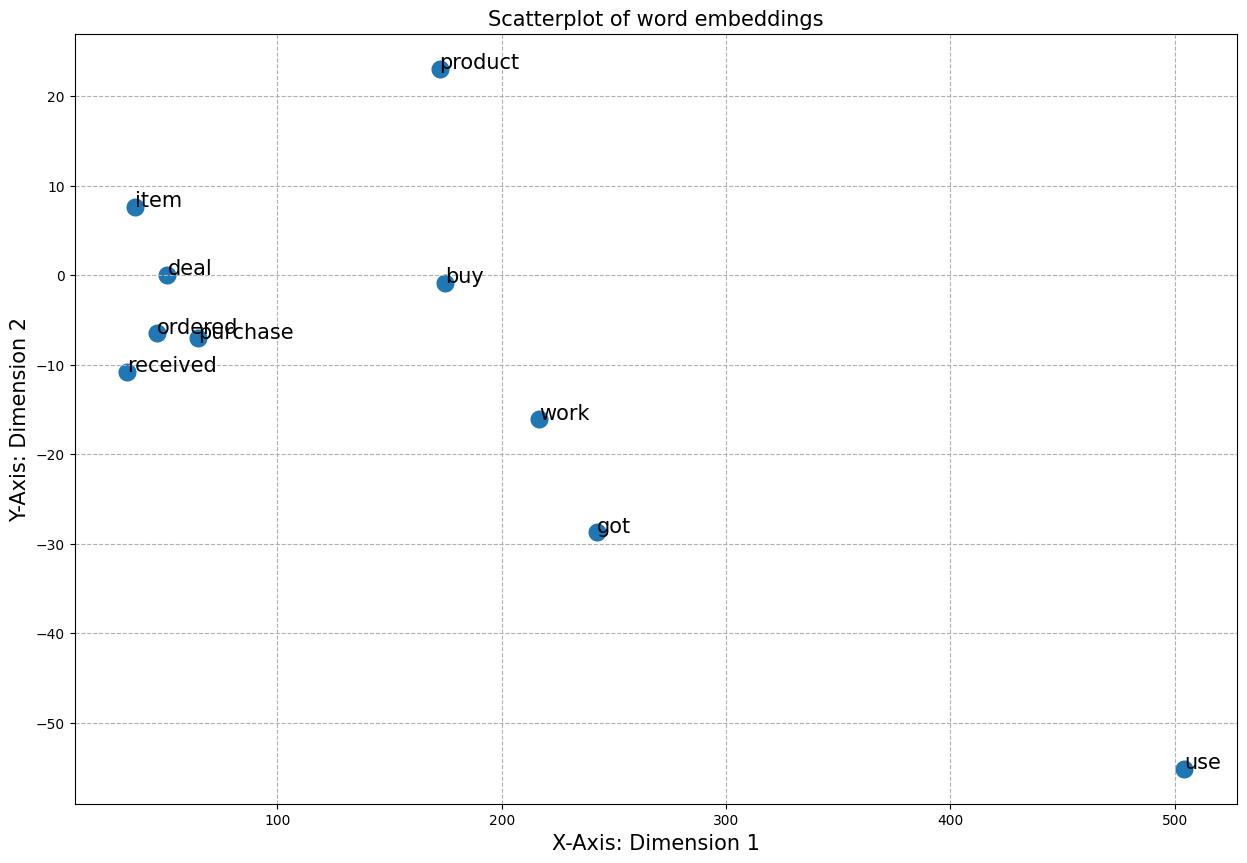

In [17]:
def plot_embeddings(M_reduced, word2index, words_to_plot):

    """ Plot in a scatterplot the embeddings of the words specified in the list "words".
        NOTE: do not plot all the words listed in M_reduced / word2ind.
        Include a label next to each point.
        Params:
            M_reduced (numpy matrix of shape (number of unique words in the corpus , 2)): matrix of 2-dimensioal word embeddings
            word2index (dict): dictionary that maps word to indices for matrix M
            words_to_plot (list of strings): words whose embeddings we want to visualize
    """

    # Get the index of each word in the list of words_to_plot from word2index
    # Iterate through each word in the list of words_to_plot and map with the index in the word2index dictionary
    words_to_plot_indices = []
    for word in words_to_plot:
        words_to_plot_indices.append(word2index[word])

    # Get the embeddings of only the group of words in "words_to_plot"
    embeddings_to_plot = M_reduced[words_to_plot_indices]

    # plot a scatterplot
    plt.figure(figsize=(15,10))
    sns.scatterplot(x=embeddings_to_plot[:, 0], y=embeddings_to_plot[:, 1], s=200)
    plt.grid(visible=True, which='major', linestyle='--', linewidth=0.8)

    # Add labels, and title on the plot
    for index, word in enumerate(words_to_plot):
        plt.annotate(word, (embeddings_to_plot[index, 0], embeddings_to_plot[index, 1]), fontsize=15)
    plt.xlabel('X-Axis: Dimension 1', fontsize=15)
    plt.ylabel('Y-Axis: Dimension 2', fontsize=15)
    plt.title('Scatterplot of word embeddings', fontsize=15)


words_to_plot = ['purchase', 'buy', 'work', 'got', 'ordered', 'received', 'product', 'item', 'deal', 'use']
plot_embeddings(M_reduced_count_based, word2index_count_based, words_to_plot)

#### 2.2 Prediction-based word vectors from GloVe

**2.2a** <br>Please use the provided load_embedding_model() function to load the GloVe embeddings. Note: If this is your first time to run these cells, i.e. download the embedding model, it will take a couple minutes to run. If you've run these cells before, rerunning them will load the model without redownloading it, which will take about 1 to 2 minutes.

In [18]:
# Download the embedding model
def load_embedding_model():

    """ Load GloVe Vectors
        Return:
            wv_from_bin: All 400000 embeddings, each lengh 200
    """

    # Download the embedding model (Only the first time)
    import gensim.downloader as api
    wv_from_bin = api.load("glove-wiki-gigaword-200")

    print("Loaded vocab size %i" % len(list(wv_from_bin.index_to_key)))

    return wv_from_bin

wv_from_bin = load_embedding_model()

Loaded vocab size 400000


**2.2b** <br>Select the words in the vocabulary returned in 2.1a and get the corresponding GloVe vectors. You can adapt the provided function get_matrix_of_vectors(wv_from_bin, required_words) to select the Glove vectors and put them in a matrix M.

In [19]:
def get_matrix_of_vectors(wv_from_bin, required_words):

    """ Put the GloVe vectors into a matrix M.
        Param:
            wv_from_bin: KeyedVectors object; the 400000 GloVe vectors loaded from file
            required_words: the list of strings that contains all required words
        Return:
            M: numpy matrix shape (num words, 200) containing the vectors
            word2ind: dictionary mapping each word to its row number in M
    """
    # Get the vectors of the words from GloVe
    import random
    words = list(wv_from_bin.index_to_key)
    print("Shuffling words ...")
    random.seed(225)
    random.shuffle(words)
    words = words[:]
    print("Putting %i words into word2index and matrix M..." % len(required_words))
    word2index = {}
    M = []
    curIndex = 0
    default_vector = np.zeros(200)

    # Get the vectors of the required words
    for word in required_words:
        if word in words:
            M.append(wv_from_bin.get_vector(word))
            word2index[word] = curIndex
            curIndex += 1
        else:
            # Replace missing words with a defined default vector
            M.append(default_vector)
            # Map the relationship between key: word, and value: index of the word
            word2index[word] = curIndex
            curIndex += 1
    M = np.stack(M)
    print("Done.")
    return M, word2index

M_pred_based, word2index_pred_based = get_matrix_of_vectors(wv_from_bin, corpus_words)
M_pred_based

Shuffling words ...
Putting 9697 words into word2index and matrix M...
Done.


array([[ 0.22586   ,  0.055649  ,  0.28367999, ..., -0.28356999,
         0.36353001, -0.87370002],
       [ 0.23273   , -0.048693  ,  0.76813   , ..., -0.55684   ,
        -0.44095999,  0.20299999],
       [-0.075412  ,  0.34158   , -0.66105002, ...,  0.14579   ,
        -0.57616001, -0.022035  ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.35547999,  0.22649001, -0.37088999, ..., -0.062321  ,
         0.19923   , -0.15657   ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [20]:
M_pred_based.shape

(9697, 200)

In [21]:
word2index_pred_based

{'aac': 0,
 'aas': 1,
 'aba': 2,
 'abdroid': 3,
 'abilities': 4,
 'ability': 5,
 'able': 6,
 'aboutgood': 7,
 'abouti': 8,
 'abouttherehere': 9,
 'aboutto': 10,
 'abovei': 11,
 'abroad': 12,
 'abruptly': 13,
 'absolute': 14,
 'absolutely': 15,
 'abt': 16,
 'abuse': 17,
 'abused': 18,
 'abysmal': 19,
 'accdientally': 20,
 'accept': 21,
 'acceptable': 22,
 'acceptably': 23,
 'accepted': 24,
 'accepting': 25,
 'accepts': 26,
 'access': 27,
 'accessed': 28,
 'accesses': 29,
 'accessible': 30,
 'accessing': 31,
 'accessories': 32,
 'accessory': 33,
 'accessoryalternative': 34,
 'accident': 35,
 'accidentally': 36,
 'accidently': 37,
 'acclimated': 38,
 'accolades': 39,
 'accommodate': 40,
 'accomplish': 41,
 'accord': 42,
 'according': 43,
 'accordingly': 44,
 'account': 45,
 'accros': 46,
 'accurate': 47,
 'accuratei': 48,
 'accuratethe': 49,
 'ace': 50,
 'acer': 51,
 'acess': 52,
 'acheive': 53,
 'achieve': 54,
 'achieved': 55,
 'achievedusing': 56,
 'achieves': 57,
 'acitve': 58,
 'ackno

**2.2c** <br>Use the function reduce_to_k_dim() you implemented in 1)c to reduce the vectors to 2 dimension. Similar to what you did in 1)c.

In [22]:
M_reduced_pred_based = reduce_to_k_dim(M_pred_based)
M_reduced_pred_based

array([[-0.6654562 ,  1.90102906],
       [-1.06744851,  0.76112002],
       [ 0.02208927, -0.53159346],
       ...,
       [ 0.        ,  0.        ],
       [-0.16928242,  2.9489755 ],
       [ 0.        ,  0.        ]])

In [23]:
M_reduced_pred_based.shape

(9697, 2)

**2.2d** <br>Use the plot_embeddings function in 1)d to get the plot for the same set of words in 1)d. Compare the differences of the plot in 1)d and 2)d, provide some analysis, and describe your findings.

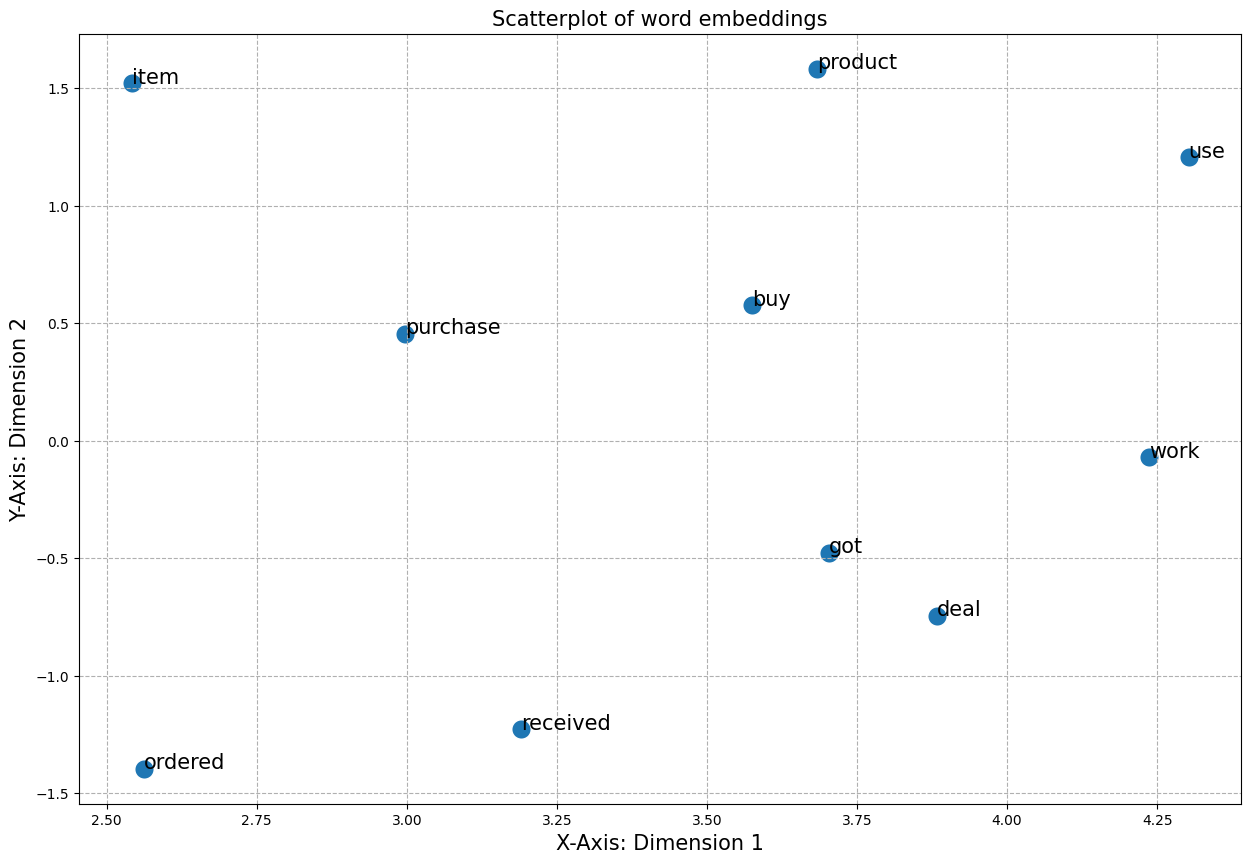

In [24]:
plot_embeddings(M_reduced_pred_based, word2index_pred_based, words_to_plot)

***Compare the difference of the scatter plot between Count-Based and Prediction-Based***

In [25]:
# Get some information for summary

# The number of each plotted word
num_plot_words = {}
for word in words_to_plot:
    num_plot_words[word] = 0

for review in dataset['reviewText']:
    for word in review:
        if word in num_plot_words:
            num_plot_words[word] = num_plot_words.get(word, 0) + 1

# The total number of words in the entire reviews
total_words = 0
for review in dataset['reviewText']:
    total_words += len(review)

print(num_plot_words)
print("\nTotal words of the entire reviews:", total_words)

{'purchase': 166, 'buy': 455, 'work': 485, 'got': 568, 'ordered': 104, 'received': 78, 'product': 529, 'item': 119, 'deal': 129, 'use': 1115}

Total words of the entire reviews: 124713


**From the scatter plots above,**
<br>**1) Count-based word vectors with co-occurrence matrix**
- Words tend to cluster together.
- Words that share similar frequencies of occurrence often form clusters, as demonstrated by the words such as "item," "deal," "purchase," "ordered," and "received."

**2) Prediction-based word vectors from GloVe**
- Words do not tend to cluster together.

Therefore, count-based word vectors with co-occurrence matrix emphasizes word frequency, leading to the observation that words with similar frequency tend to cluster together as shown in the plot. In contrast, prediction-based word vectors from GloVe focuses on the meanings of words, however the plot does not display clear clusters which may be caused by limited context or data and low frequencies of occurrence of words.

## Task 2: Sentiment Classification Algorithms

### 3. Perform sentiment analysis with classification

#### 3.1 Review embeddings
Similar to what you did in 2.2c, use the function
reduce_to_k_dim() you implemented in 2.1c to reduce the vectors to 128 dimension. Based on the word embeddings, get the review embedding by taking the average of the word embeddings in each review. Write a function for getting review embeddings for each review.

In [26]:
def get_average_embeddings(M_reduced, dataset, word2index):

    """ A function to get review embeddings for each review
        by taking the average of the word embedding in each review
        Params:
            M_reduced: matrix of 128-dimentional word embeddings
            dataset: the original review data that has already tokenized the text into tokens
            word2index: a dictionary that maps words to indices
        Return:
            review_embeddings: the review embedding from taking the average of the word embeddings in each review
    """

    # Create a list to store the review embeddings
    review_embeddings = np.zeros((len(dataset), len(M_reduced[0])))

    # Iterate through the list of tokenized text
    for index, review in enumerate(dataset['reviewText']):

        for j in range(len(M_reduced[0])):
            # Define variables to calculate an average value
            sum_embeddings = 0
            count = 0

            # Iterate through the list of each review
            for word in review:
                word_index = word2index[word]
                word_vector = M_reduced[word_index][j]
                sum_embeddings += word_vector
                count += 1

            # Get the average of the word embeddings
            average_embeddings = sum_embeddings / count
            review_embeddings[index][j] = average_embeddings

    return review_embeddings


# Reduce the dimentionality of matrix M with k = 128
M_reduced_pred_based_k128 = reduce_to_k_dim(M_pred_based, k=128)

# Call a function "get_average_embeddings" to get the average of words embeddings in each review
review_embeddings = get_average_embeddings(M_reduced_pred_based_k128, dataset, word2index_pred_based)
review_embeddings_dataframe = pd.DataFrame(review_embeddings)
new_dataset = pd.concat([dataset, review_embeddings_dataframe], axis=1)
new_dataset

,overall,reviewText,0,1,2,3,4,5,6,7,...,118,119,120,121,122,123,124,125,126,127
0,4,[issues],3.921470,-0.102500,-0.527179,-1.721730,-0.403041,0.204319,0.046771,-0.130746,...,0.011121,-0.610979,0.059532,0.363161,0.022573,0.223158,0.508524,0.186824,0.387486,0.159558
1,5,"[purchased, device, worked, advertised, never,...",2.915476,0.734701,0.114749,0.642308,-0.556564,-0.429263,0.051756,-0.177361,...,0.065480,0.147966,-0.044115,-0.013979,-0.085345,0.081281,0.034410,-0.080015,0.033658,0.060653
2,4,"[works, expected, sprung, higher, capacity, th...",2.891930,0.262045,0.134002,0.318028,0.173038,0.128958,0.357666,-0.231042,...,-0.200451,-0.032122,-0.047599,0.078180,0.014160,0.073461,-0.001141,-0.018700,0.100059,0.017396
3,5,"[think, worked, greathad, diff, bran, gb, card...",2.482578,-0.074888,-0.165305,0.262743,-0.277060,-0.174163,0.298775,0.360669,...,0.191203,0.001288,0.046776,-0.029867,0.000282,0.025669,0.120411,0.042415,-0.090916,0.075452
4,5,"[bought, retail, packaging, arrived, legit, or...",2.396886,0.247296,-0.286311,0.697848,-0.362116,-0.350881,0.368015,-0.242986,...,0.117529,-0.085948,0.010717,-0.074184,-0.044907,-0.068629,-0.041571,0.034589,-0.044345,0.044217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4910,1,"[bought, sandisk, gb, class, use, htc, inspire...",2.299032,0.451168,0.156860,0.409932,-0.530156,-0.509213,0.238863,0.190859,...,0.035841,-0.005646,0.036482,-0.054569,-0.031950,-0.005209,0.016461,0.042286,-0.064967,0.010630
4911,5,"[used, extending, capabilities, samsung, galax...",2.625930,0.550545,-0.574834,0.070337,-0.016765,-0.296078,0.160782,0.110169,...,0.262519,-0.129362,0.016773,-0.034708,-0.006220,0.003554,-0.062215,-0.096139,-0.003290,0.167573
4912,5,"[great, card, fast, reliable, comes, optional,...",2.745499,0.855996,-0.254797,0.447117,-0.383562,-0.146923,0.222204,0.059298,...,-0.028468,-0.026185,0.041305,0.031645,0.104029,0.032199,0.096698,0.140490,-0.147612,0.000884
4913,5,"[good, amount, space, stuff, want, fits, gopro...",2.974746,0.635473,0.868006,0.256999,-0.209651,-0.036941,0.330371,-0.263220,...,0.079665,-0.108082,0.044961,0.129303,-0.103027,0.070795,-0.159955,-0.020146,-0.111115,0.100223


#### 3.2 Models and 3.3 Evaluation
I will implement Logistic Regression, with L2 regularization and A Neural Network (NN) model for sentiment analysis. Then, I will evaluate the performance in predictions of these 2 models, using sklearn, Tensorflow, and Keras packages.

In this case, I will perform sentiment analysis with classification and I will simplify the task as a binary classification problem. I will consider positive reviews (Score 4 and 5) as 1, and negative reviews (Score 1, 2, and 3) as 0.

In [27]:
# Convert the target variable from multi-class to binary-class
new_dataset['overall'] [new_dataset['overall'] <= 3] = 0
new_dataset['overall'] [new_dataset['overall'] > 3] = 1
new_dataset

<ipython-input-27-892b68022222>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset['overall'] [new_dataset['overall'] <= 3] = 0
<ipython-input-27-892b68022222>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset['overall'] [new_dataset['overall'] > 3] = 1


,overall,reviewText,0,1,2,3,4,5,6,7,...,118,119,120,121,122,123,124,125,126,127
0,1,[issues],3.921470,-0.102500,-0.527179,-1.721730,-0.403041,0.204319,0.046771,-0.130746,...,0.011121,-0.610979,0.059532,0.363161,0.022573,0.223158,0.508524,0.186824,0.387486,0.159558
1,1,"[purchased, device, worked, advertised, never,...",2.915476,0.734701,0.114749,0.642308,-0.556564,-0.429263,0.051756,-0.177361,...,0.065480,0.147966,-0.044115,-0.013979,-0.085345,0.081281,0.034410,-0.080015,0.033658,0.060653
2,1,"[works, expected, sprung, higher, capacity, th...",2.891930,0.262045,0.134002,0.318028,0.173038,0.128958,0.357666,-0.231042,...,-0.200451,-0.032122,-0.047599,0.078180,0.014160,0.073461,-0.001141,-0.018700,0.100059,0.017396
3,1,"[think, worked, greathad, diff, bran, gb, card...",2.482578,-0.074888,-0.165305,0.262743,-0.277060,-0.174163,0.298775,0.360669,...,0.191203,0.001288,0.046776,-0.029867,0.000282,0.025669,0.120411,0.042415,-0.090916,0.075452
4,1,"[bought, retail, packaging, arrived, legit, or...",2.396886,0.247296,-0.286311,0.697848,-0.362116,-0.350881,0.368015,-0.242986,...,0.117529,-0.085948,0.010717,-0.074184,-0.044907,-0.068629,-0.041571,0.034589,-0.044345,0.044217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4910,0,"[bought, sandisk, gb, class, use, htc, inspire...",2.299032,0.451168,0.156860,0.409932,-0.530156,-0.509213,0.238863,0.190859,...,0.035841,-0.005646,0.036482,-0.054569,-0.031950,-0.005209,0.016461,0.042286,-0.064967,0.010630
4911,1,"[used, extending, capabilities, samsung, galax...",2.625930,0.550545,-0.574834,0.070337,-0.016765,-0.296078,0.160782,0.110169,...,0.262519,-0.129362,0.016773,-0.034708,-0.006220,0.003554,-0.062215,-0.096139,-0.003290,0.167573
4912,1,"[great, card, fast, reliable, comes, optional,...",2.745499,0.855996,-0.254797,0.447117,-0.383562,-0.146923,0.222204,0.059298,...,-0.028468,-0.026185,0.041305,0.031645,0.104029,0.032199,0.096698,0.140490,-0.147612,0.000884
4913,1,"[good, amount, space, stuff, want, fits, gopro...",2.974746,0.635473,0.868006,0.256999,-0.209651,-0.036941,0.330371,-0.263220,...,0.079665,-0.108082,0.044961,0.129303,-0.103027,0.070795,-0.159955,-0.020146,-0.111115,0.100223


In [28]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

***Logistic Regression, with L2 Regularization***

In [1]:
def imp_log_reg(X_train, y_train, X_val, y_val, X_test, y_test):

    """ A function to implement logistic regression
        Params:
            X_train: input features of the dataset for training data
            y_train: a target variable of the dataset for training data
            X_val: input features for validating data
            y_val: a target variable for validating data
            X_test: input features for testing data
            y_test: a target variable of the dataset for testing data
        Return:
            accuracy: the prediction accuracy of the model
            auc_result: the auc score of the model
            classification_report: a classification report displays the performance of the model
            confusion_matrix: a confusion matrix displays the performance of the model
    """
    # Define the list of learning rate value to validate the model
    best_accuracy = 0
    best_c = None
    c_params = [0.001, 0.01, 0.1, 1, 10, 100]

    # Iterate through the list of learning rate parameters to find the best learning rate
    for c in c_params:
        model = LogisticRegression(multi_class='auto', penalty='l2', C=c)
        model.fit(X_train, y_train)

        # Validate the model with validate data to find the best learning rate
        y_val_pred = model.predict(X_val)
        val_accuracy = accuracy_score(y_val, y_val_pred)
        print("Validation Accuracy for C =", c, ":", val_accuracy)

        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_c = c

    print("The best value of parameter C is", best_c)
    # Create a logistic regression model with L2 regularization
    model = LogisticRegression(penalty='l2', C=best_c, max_iter=40)

    # Train the model on the training datas
    model.fit(X_train, y_train)

    # Test the model to predict the desired variable
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    auc_result = roc_auc_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    return accuracy, auc_result, class_report, conf_matrix

# Define features and target variables
X = new_dataset.drop(columns=['overall', 'reviewText'])
y = pd.DataFrame(new_dataset['overall'])

# Split the dataset into 3 parts including, train data, validation data, and test data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=100)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.1, random_state=100)

accuracy, auc_result, class_report, conf_matrix = imp_log_reg(X_train, y_train, X_val, y_val, X_test, y_test)
print("accuracy:", accuracy)
print("auc score", auc_result)
print("\nclassification report:")
print(class_report)
print("\nconfusion matrix:")
print(conf_matrix)

NameError: name 'new_dataset' is not defined

***A Neural Network (NN) model for sentiment classification***

In [30]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras

Epoch 1/10
123/123 [==============================] - 1s 4ms/step - loss: 0.3456 - accuracy: 0.8749 - val_loss: 0.2975 - val_accuracy: 0.9038
Epoch 2/10
123/123 [==============================] - 0s 3ms/step - loss: 0.2804 - accuracy: 0.9059 - val_loss: 0.2755 - val_accuracy: 0.9038
Epoch 3/10
123/123 [==============================] - 0s 3ms/step - loss: 0.2598 - accuracy: 0.9062 - val_loss: 0.2571 - val_accuracy: 0.9038
Epoch 4/10
123/123 [==============================] - 0s 3ms/step - loss: 0.2427 - accuracy: 0.9064 - val_loss: 0.2424 - val_accuracy: 0.9061
Epoch 5/10
123/123 [==============================] - 0s 4ms/step - loss: 0.2289 - accuracy: 0.9087 - val_loss: 0.2310 - val_accuracy: 0.9072
Epoch 6/10
123/123 [==============================] - 0s 3ms/step - loss: 0.2176 - accuracy: 0.9128 - val_loss: 0.2225 - val_accuracy: 0.9140
Epoch 7/10
123/123 [==============================] - 1s 4ms/step - loss: 0.2093 - accuracy: 0.9171 - val_loss: 0.2157 - val_accuracy: 0.9152
Epoch 

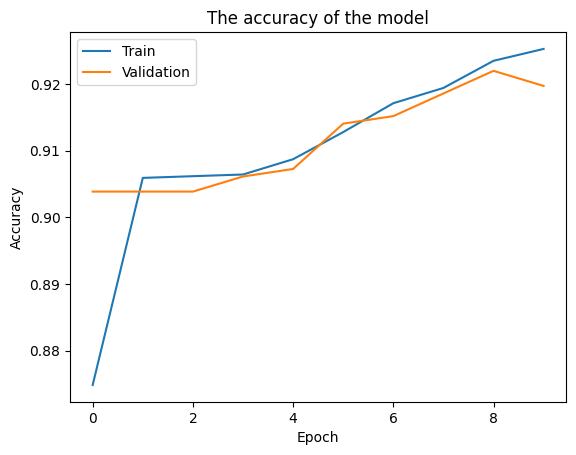

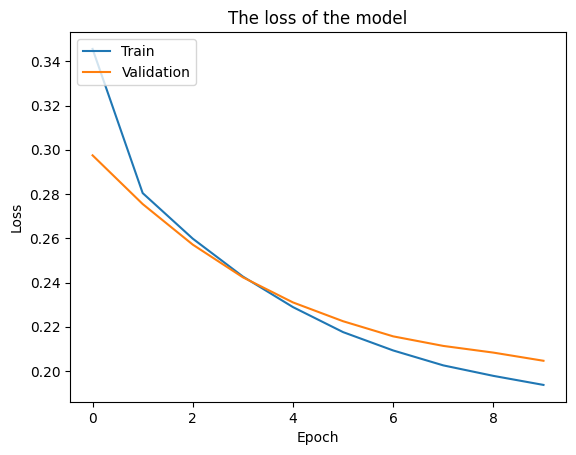

4/4 [==============================] - 0s 3ms/step
accuracy: 0.9292929292929293
auc score 0.6818181818181819

classification report:
              precision    recall  f1-score   support

           0       1.00      0.36      0.53        11
           1       0.93      1.00      0.96        88

    accuracy                           0.93        99
   macro avg       0.96      0.68      0.75        99
weighted avg       0.93      0.93      0.91        99


confusion matrix:
[[ 4  7]
 [ 0 88]]


In [31]:
def imp_nn(X_train, y_train, X_val, y_val, X_test, y_test):
    """ A function to build and implement a neural network for sentiment analysis
        Params:
            X_train: input features of the dataset for training data
            y_train: a target variable of the dataset for training data
            X_val: input features for validating data
            y_val: a target variable for validating data
            X_test: input features for testing data
            y_test: a target variable of the dataset for testing data
        Return:
            accuracy: the prediction accuracy of the model
            auc_result: the auc score of the model
            classification_report: a classification report displays the performance of the model
            confusion_matrix: a confusion matrix displays the performance of the model
    """

    # Defines a neural network model
    model = keras.Sequential([
        keras.layers.Input(shape=(128,)), # Set input layer
        keras.layers.Dense(64, activation='sigmoid'), # Set hidden layer
        keras.layers.Dense(2, activation='sigmoid') # Set output layer
    ])

    # Compile the model before training the model to train dataset.
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

    # Train the model
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

    # Print the loss and accuracy after testing the model.
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"Testing loss: {loss}")
    print(f"Testing accuracy: {accuracy}")

    # Plot the graph to see the training and validation accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('The accuracy of the model')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot the graph to see the training and validation loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('The loss of the model')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Test the model to predict the desired variable
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    auc_result = roc_auc_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    return accuracy, auc_result, class_report, conf_matrix

accuracy, auc_result, class_report, conf_matrix = imp_nn(X_train, y_train, X_val, y_val, X_test, y_test)
print("accuracy:", accuracy)
print("auc score", auc_result)
print("\nclassification report:")
print(class_report)
print("\nconfusion matrix:")
print(conf_matrix)

#### Summary
Based on the results of accuracy, precision, recall, f1 score, and AUC score, the differences between the two models are very small.

In terms of model complexity, data size, and training time, the Neural Network model is more complex than the Logistic Regression model, requires more data, and takes longer to train. Therefore, for this case where the data size is small and the analysis doesn't require complex computations for sentiment analysis, Logistic Regression would be a better choice.